In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import desc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [35]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [40]:
# measurement_df=measurement_df.dropna() # to do

In [41]:
# station_df=station_df.dropna() # to do

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from datetime import timedelta, datetime
# Calculate the date 1 year ago from the last data point in the database
## find the last recording date
max_date = session.query(func.max(Measurement.date))

In [60]:
for m in max_date:
    end_date = m[0]
# sql_statement='SELECT MAX(date) FROM Measurement'
## find 1 year prior to the last recording date
begin_date = end_date[4:]
previous_year = int(end_date[:4]) - 1
begin_date = str(previous_year) + begin_date
print(begin_date)
print(end_date)

2016-08-23
2017-08-23


In [66]:
# date 1 year ago from end date
year = timedelta(days=365)
print(end_date)
end_date_ = datetime.strptime(end_date, '%Y-%m-%d')
print(year)
print(end_date_)
begin_date_ = end_date_ - year
print(begin_date_)

2017-08-23
365 days, 0:00:00
2017-08-23 00:00:00
2016-08-23 00:00:00


In [67]:
# Perform a query to retrieve the data and precipitation scores
measurement =   session.query(Measurement).\
                filter(Measurement.date >= begin_date_, Measurement.date <= end_date_)

precipitation_data=[]
                
for m in measurement:
    precipitation_data.append((m.id,m.station,m.date,m.prcp,m.tobs))
# sql_statement="SELECT * FROM Measurement WHERE date BETWEEN " + "'" + begin_date + "'" + ' AND ' + "'" + end_date + "'" 
precipitation_data

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [157]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data_df = pd.DataFrame(precipitation_data, columns =['station activity', 'station', 'date', 'prcp', 'tobs']) 
precipitation_data_df.head()

,station activity,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [158]:
# Sort the dataframe by date
precipitation_data_df=precipitation_data_df.sort_values('date')
precipitation_data_df=precipitation_data_df.reset_index()
precipitation_data_df.head()

,index,station activity,station,date,prcp,tobs
0,0,2364,USC00519397,2016-08-23,0.00,81.0
1,1009,8825,USC00517948,2016-08-23,NaN,80.0
2,1529,14608,USC00519281,2016-08-23,1.79,77.0
3,704,7331,USC00514830,2016-08-23,0.05,80.0
4,361,5091,USC00513117,2016-08-23,0.15,76.0


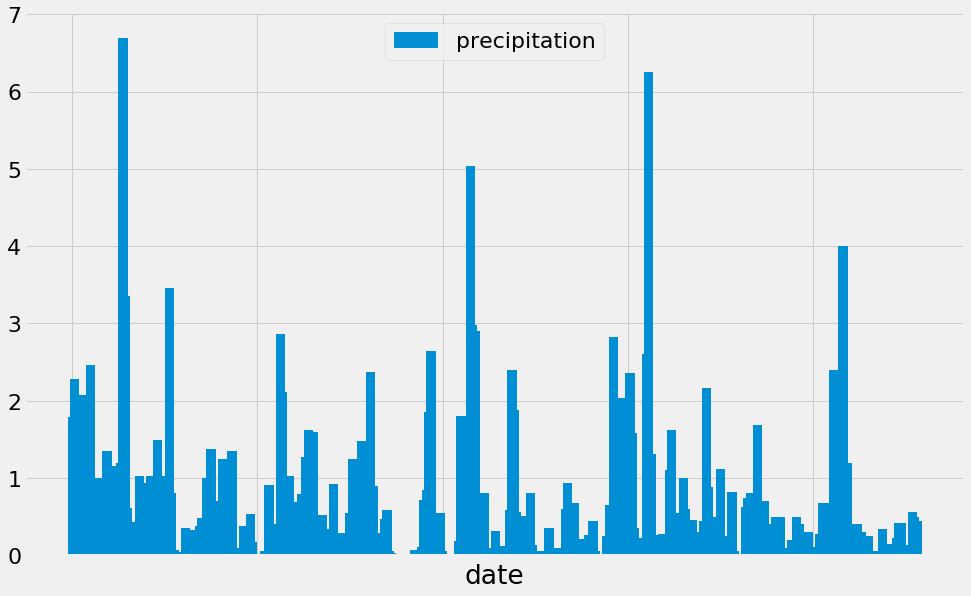

In [159]:
# Use Pandas Plotting with Matplotlib to plot the data
#  to do: round tops / gray x ticks
fig = plt.figure()
fig.patch.set_facecolor('0.94')
plt.bar(precipitation_data_df['date'],precipitation_data_df['prcp'],width=4,label='precipitation')
# plot layout
plt.xlabel('date')
x_ticks=np.arange(0,365,80)
plt.xticks(x_ticks,[])
plt.legend(loc='upper center')
plt.grid(b=True, which='major', axis='both')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize']= (15,10)
# save plot
plt.savefig("precipitation.png")
# show plot
plt.show()

In [160]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation=pd.DataFrame(precipitation_data_df['prcp'])
precipitation.columns=['precipitation']
precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [161]:
# Design a query to show how many stations are available in this dataset?
st_av = session.query(func.count(distinct(Measurement.station)))
stations_available=[]
for s_a in st_av:
    stations_available.append(s_a)
# sql_statement="SELECT COUNT(DISTINCT(station)) AS 'number of stations' FROM Station"
stations_available

[(9)]

In [206]:
# What are the most active stations? (i.e. what stations have the most rows)? # to do
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station).label('count')]
most_act =  session.query(*sel).\
            group_by(Measurement.station).\
            order_by(desc(Measurement.station))

most_active_stations=[]
                
for mas in most_act:
    most_active_stations.append(mas)
most_active_stations

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [200]:
# What are the most active stations? (i.e. what stations have the most rows)? # to do
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)]
most_act =  session.query(Measurement.station, func.count(Measurement.station) as count).\
            group_by(Measurement.station).\
            order_by(desc(Measurement.station)).all()

most_active_stations=[]
                
for mas in most_act:
    most_active_stations.append((mas.station, mas.count)
most_active_stations

SyntaxError: invalid syntax (<ipython-input-200-a534a3bbf3c5>, line 5)

In [84]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations=[]
sql_statement='SELECT station, COUNT(station) AS count FROM Measurement GROUP BY station ORDER BY count DESC' 
result = engine.execute(sql_statement)
for _r in result:
    most_active_stations.append(_r)
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
USC00519281_details = []
sql_statement="SELECT MIN(tobs) 'lowest temperature recorded', MAX(tobs) 'highest temperature recorded', AVG(tobs) 'average temperature' FROM Measurement WHERE station = 'USC00519281'"
result = engine.execute(sql_statement)
for _r in result:
    USC00519281_details.append(_r)
USC00519281_details

[(54.0, 85.0, 71.66378066378067)]

In [87]:
# Choose the station with the highest number of temperature observations. 
# hnto: highest number of temperature observations
hnto=[]
sql_statement="SELECT station, count(station) AS count FROM Measurement GROUP BY station ORDER BY count DESC" 
result = engine.execute(sql_statement)
for _r in result:
    hnto.append(_r)
hnto[0]

('USC00519281', 2772)

In [ ]:
Measurement.station,

In [121]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data=[]
sql_statement="SELECT date, tobs  FROM Measurement WHERE ( date BETWEEN " + "'" + begin_date + "'" + ' AND ' + "'" + end_date + "')" " AND station = 'USC00519281' ORDER BY date"
result = engine.execute(sql_statement)
for _r in result:
    temperature_data.append(_r)
temperature_data_df= pd.DataFrame(temperature_data)
temperature_data_df=temperature_data_df.rename(columns={0: 'date', 1: 'tobs'})
# list(temperature_data_df)
# temperature_data_df['date']

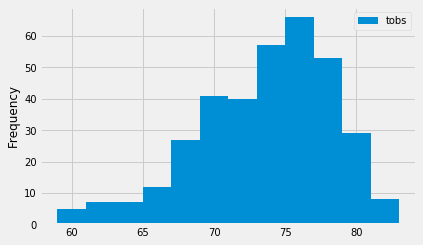

<Figure size 432x288 with 0 Axes>

In [143]:
## histogram
bins=12 #months
fig = plt.figure()
fig.patch.set_facecolor('0.94')
n, bins, patches = plt.hist(temperature_data_df['tobs'], bins, label='tobs')
plt.ylabel('Frequency')
x_ticks=np.arange(60,80,5)
plt.legend(loc='upper right')
plt.grid(b=True, which='major', axis='both')
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize']= (6,4)
plt.show()
# save plot
plt.savefig("tobs.png")

In [89]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
#     TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
    temps = []
#     sql_statement="SELECT MIN(tobs) 'lowest temperature recorded', MAX(tobs) 'highest temperature recorded', AVG(tobs) 'average temperature' FROM Measurement WHERE date BETWEEN " + "'" + start_date + "'" + ' AND ' + "'" + end_date + "')""
    sql_statement="SELECT MIN(tobs) 'lowest temperature recorded', MAX(tobs) 'highest temperature recorded', AVG(tobs) 'average temperature' FROM Measurement WHERE date BETWEEN " + "'" + start_date  + "'" + " AND " + "'" + end_date + '"'
    result = engine.execute(sql_statement)
    for _r in result:
        temps.append(_r)
    print(temps)
#     Returns:
#         TMIN, TAVE, and TMAX
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

OperationalError: (sqlite3.OperationalError) unrecognized token: "'2012-03-05"" [SQL: 'SELECT MIN(tobs) \'lowest temperature recorded\', MAX(tobs) \'highest temperature recorded\', AVG(tobs) \'average temperature\' FROM Measurement WHERE date BETWEEN \'2012-02-28\' AND \'2012-03-05"'] (Background on this error at: http://sqlalche.me/e/e3q8)

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


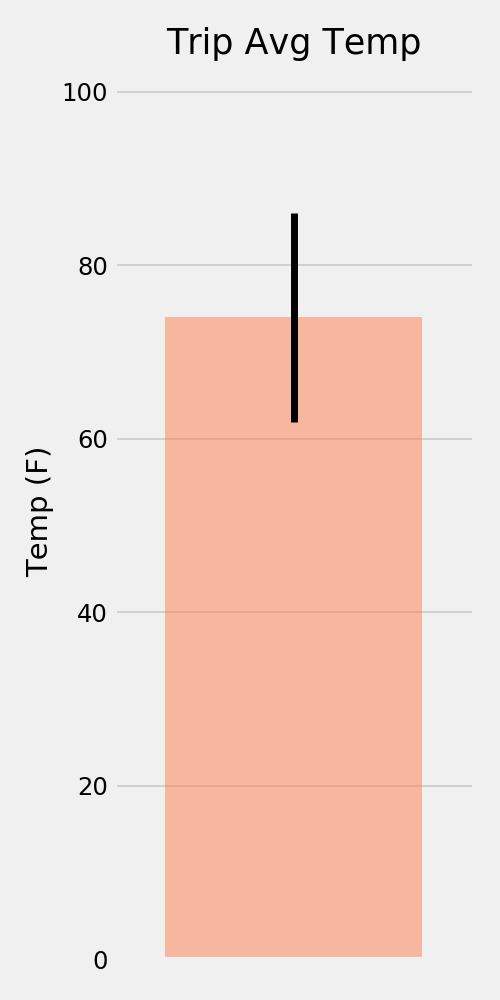

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


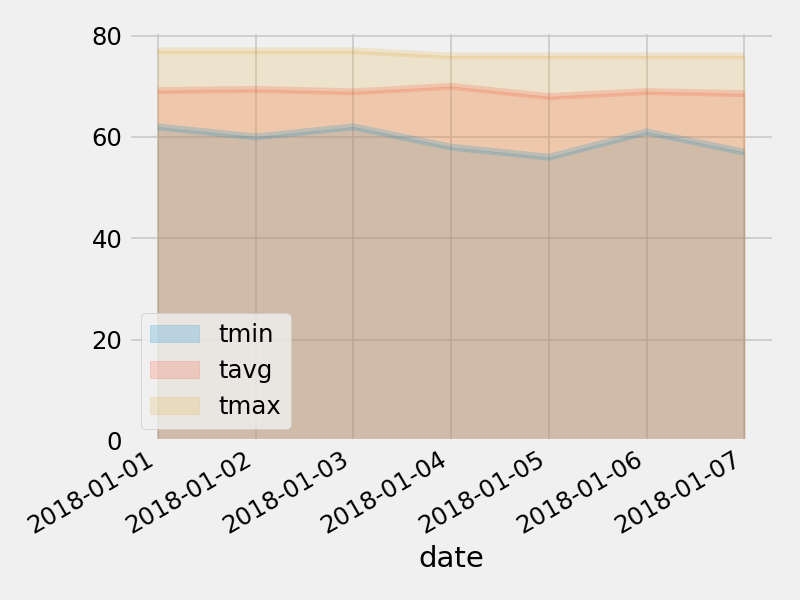

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
